# FFNN

In [201]:
import pandas as pd
import numpy as np

#For data visualization
import seaborn as sns
import matplotlib.pyplot as plt
import plotly
import plotly.express as ex

#For data preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

#For model building
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers

#For model evaluation

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import classification_report
import statsmodels.api as sm

In [202]:
df=pd.read_csv('heart.csv')
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


# Chuẩn hóa dữ liệu

In [203]:
cat_cols = df[['caa', 'cp', 'restecg', 'exng', 'sex', 'output']].copy()
cat_cols.head()

,caa,cp,restecg,exng,sex,output
0,0,3,0,0,1,1
1,0,2,1,0,1,1
2,0,1,0,0,0,1
3,0,1,1,0,1,1
4,0,0,1,1,0,1


In [204]:
num_cols = df[['age','trtbps','fbs','thalachh','oldpeak','slp','thall','chol']].copy()
num_cols.head()

,age,trtbps,fbs,thalachh,oldpeak,slp,thall,chol
0,63,145,1,150,2.3,0,1,233
1,37,130,0,187,3.5,0,2,250
2,41,130,0,172,1.4,2,2,204
3,56,120,0,178,0.8,2,2,236
4,57,120,0,163,0.6,2,2,354


In [205]:
sc = StandardScaler()
le = LabelEncoder()

In [206]:
for col in cat_cols.columns:
    cat_cols[col] = le.fit_transform(cat_cols[col])
        
sc_num_cols = sc.fit_transform(num_cols)
num_cols = pd.DataFrame(sc_num_cols,columns = num_cols.columns)

In [207]:
df_final = pd.concat([num_cols,cat_cols],axis = 1)
df_final.head()

,age,trtbps,fbs,thalachh,oldpeak,slp,thall,chol,caa,cp,restecg,exng,sex,output
0,0.952197,0.763956,2.394438,0.015443,1.087338,-2.274579,-2.148873,-0.256334,0,3,0,0,1,1
1,-1.915313,-0.092738,-0.417635,1.633471,2.122573,-2.274579,-0.512922,0.072199,0,2,1,0,1,1
2,-1.474158,-0.092738,-0.417635,0.977514,0.310912,0.976352,-0.512922,-0.816773,0,1,0,0,0,1
3,0.180175,-0.663867,-0.417635,1.239897,-0.206705,0.976352,-0.512922,-0.198357,0,1,1,0,1,1
4,0.290464,-0.663867,-0.417635,0.583939,-0.379244,0.976352,-0.512922,2.082050,0,0,1,1,0,1


# Dropout

Optimization terminated successfully.
         Current function value: 0.348904
         Iterations 7


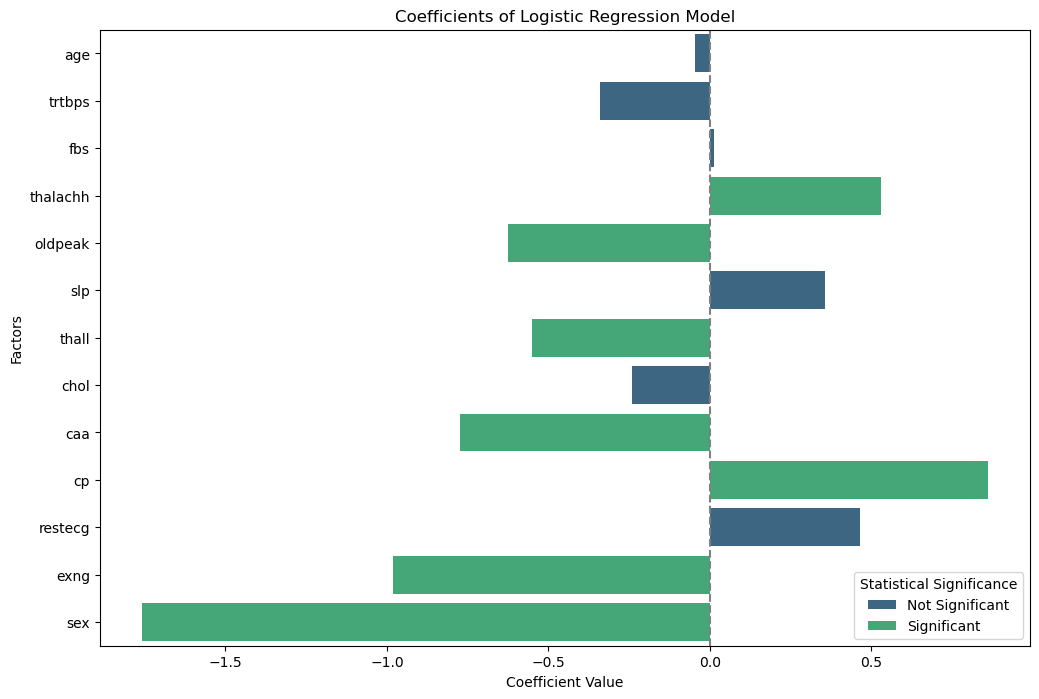

,Factors,Coefficients,P-Values,Significance
0,age,-0.044506,0.832266,Not Significant
1,trtbps,-0.341020,0.059582,Not Significant
2,fbs,0.012406,0.947464,Not Significant
3,thalachh,0.530772,0.026485,Significant
4,oldpeak,-0.626263,0.011523,Significant
5,slp,0.356383,0.097717,Not Significant
6,thall,-0.550403,0.001910,Significant
7,chol,-0.239592,0.220873,Not Significant
8,caa,-0.773349,0.000051,Significant
9,cp,0.859851,0.000004,Significant


In [208]:
X = df_final.drop("output",axis = 1)
y = df_final.output

# Adding a constant to the model (intercept)
X_const = sm.add_constant(X)

# Building the logistic regression model
model = sm.Logit(y, X_const)
result = model.fit()

# Extracting coefficients and p-values
coefficients = result.params[1:]  # Excluding the intercept
p_values = result.pvalues[1:]  # Excluding the intercept for p-values

# Creating a dataframe for visualization
viz_df = pd.DataFrame({
    'Factors': coefficients.index,
    'Coefficients': coefficients.values,
    'P-Values': p_values.values
})

# Adding a column for the significance of coefficients
viz_df['Significance'] = np.where(viz_df['P-Values'] <= 0.05, 'Significant', 'Not Significant')

# Plotting the coefficients
plt.figure(figsize=(12, 8))
sns.barplot(x='Coefficients', y='Factors', data=viz_df, hue='Significance', dodge=False, palette='viridis')
plt.title('Coefficients of Logistic Regression Model')
plt.xlabel('Coefficient Value')
plt.ylabel('Factors')
plt.axvline(x=0, color='grey', linestyle='--')
plt.legend(title='Statistical Significance', loc='lower right')

plt.show()

viz_df

In [209]:
# Filter significant features based on p-values
significant_features = viz_df[viz_df['Significance'] == 'Significant']['Factors'].tolist()

# Keep only significant features in the DataFrame X
X_filtered = X[significant_features]

# Display the DataFrame with only significant features
print(X_filtered.head())


   thalachh   oldpeak     thall  caa  cp  exng  sex
0  0.015443  1.087338 -2.148873    0   3     0    1
1  1.633471  2.122573 -0.512922    0   2     0    1
2  0.977514  0.310912 -0.512922    0   1     0    0
3  1.239897 -0.206705 -0.512922    0   1     0    1
4  0.583939 -0.379244 -0.512922    0   0     1    0


In [210]:
X_train,X_test,y_train,y_test = train_test_split(X_filtered,y,test_size=0.3,random_state=142, stratify=y)

In [211]:
# from imblearn.over_sampling import SMOTE

# sm = SMOTE(random_state=42)
# X_train, y_train = sm.fit_resample(X_train, y_train)


# Áp dụng early stop và L1 Regularization

In [212]:
# We are creating a sequential model from tensorflow keras library
model_ffnn = Sequential()

model_ffnn.add(Dense(64, input_dim=7, activation='relu', kernel_regularizer = 
regularizers.l1(1e-6)))

#Make sure you keep the number of neurons relatively low since the dataset is simple and small
#Add more neuron if the dataset is large and complex, otherwise keep it relatively low.
#Lets use 2 more hidden layers

model_ffnn.add(Dense(32, activation='relu'))
model_ffnn.add(Dense(13,activation = 'relu'))

#Finally we can have one last final layer (output layer)
#We are using a sigmoid activation function since we are dealing with a binary classification problem

model_ffnn.add(Dense(1, activation='sigmoid'))
#this ensures that the model stops training if the accuracy is not improving. Prevents overfitting
early_stop = EarlyStopping(monitor='val_loss', patience=10)

In [213]:
# Biên dịch mô hình
model_ffnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Huấn luyện mô hình trên tập huấn luyện
history_ffnn = model_ffnn.fit(X_train, y_train, epochs=90, batch_size=16,validation_data=(X_test, y_test),callbacks = [early_stop])


Epoch 1/90
14/14 [==============================] - 1s 11ms/step - loss: 0.6862 - accuracy: 0.6226 - val_loss: 0.6540 - val_accuracy: 0.7692
Epoch 2/90
14/14 [==============================] - 0s 3ms/step - loss: 0.6287 - accuracy: 0.7877 - val_loss: 0.5982 - val_accuracy: 0.8132
Epoch 3/90
14/14 [==============================] - 0s 3ms/step - loss: 0.5552 - accuracy: 0.8208 - val_loss: 0.5192 - val_accuracy: 0.8242
Epoch 4/90
14/14 [==============================] - 0s 3ms/step - loss: 0.4844 - accuracy: 0.8066 - val_loss: 0.4680 - val_accuracy: 0.8132
Epoch 5/90
14/14 [==============================] - 0s 3ms/step - loss: 0.4380 - accuracy: 0.8208 - val_loss: 0.4377 - val_accuracy: 0.8462
Epoch 6/90
14/14 [==============================] - 0s 3ms/step - loss: 0.4095 - accuracy: 0.8255 - val_loss: 0.4278 - val_accuracy: 0.8462
Epoch 7/90
14/14 [==============================] - 0s 4ms/step - loss: 0.3936 - accuracy: 0.8349 - val_loss: 0.4273 - val_accuracy: 0.8462
Epoch 8/90
14/14 [=

In [214]:
y_pred = model_ffnn.predict(X_test)
y_pred = [1 if y>=0.5 else 0 for y in y_pred]
accuracy = accuracy_score(y_test, y_pred)

print("Model Accuracy: %.2f%%" % (accuracy*100))

3/3 [==============================] - 0s 1ms/step
Model Accuracy: 86.81%


In [215]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.89      0.80      0.85        41
           1       0.85      0.92      0.88        50

    accuracy                           0.87        91
   macro avg       0.87      0.86      0.87        91
weighted avg       0.87      0.87      0.87        91



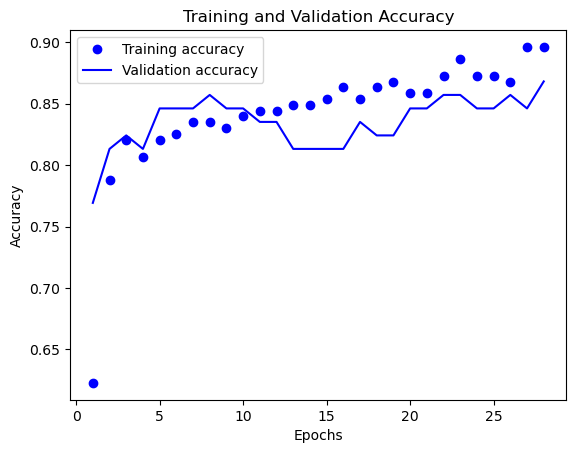

In [216]:
# Lấy thông tin lịch sử của FFNN
accuracy = history_ffnn.history['accuracy']
val_accuracy = history_ffnn.history['val_accuracy']
loss = history_ffnn.history['loss']
val_loss = history_ffnn.history['val_loss']
epochs = range(1, len(accuracy) + 1)

# Vẽ đồ thị cho độ chính xác
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Hiển thị biểu đồ
plt.show()

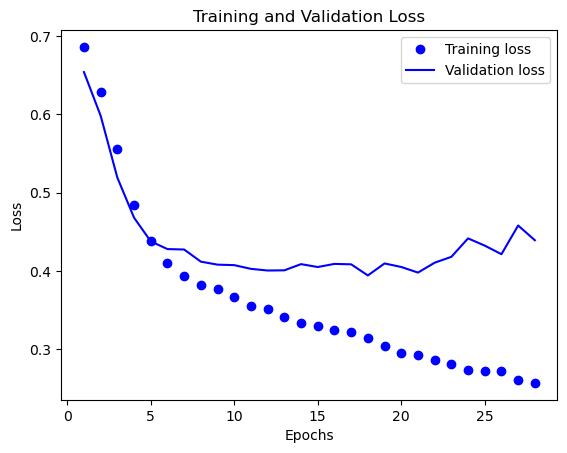

In [217]:
# Vẽ đồ thị cho mất mát
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Hiển thị biểu đồ
plt.show()

# RNN

In [218]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense
from sklearn.metrics import classification_report, accuracy_score

In [231]:
# Xây dựng mô hình RNN
model_rnn = Sequential()
model_rnn.add(SimpleRNN(50, activation='relu', input_shape=(X_train.shape[1], 1), kernel_regularizer = 
regularizers.l1(1e-6)))
model_rnn.add(Dense(1, activation='sigmoid'))

In [232]:
# Biên dịch mô hình
model_rnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [233]:
# Reshape dữ liệu để phù hợp với đầu vào của mô hình RNN
X_train_rnn = X_train.values.reshape((X_train.shape[0], X_train.shape[1], 1))
X_test_rnn = X_test.values.reshape((X_test.shape[0], X_test.shape[1], 1))


In [234]:
# Huấn luyện mô hình
history_rnn = model_rnn.fit(X_train_rnn, y_train, epochs=80, batch_size=32, validation_data=(X_test_rnn, y_test),callbacks = [early_stop])


Epoch 1/80
7/7 [==============================] - 1s 29ms/step - loss: 0.7168 - accuracy: 0.4670 - val_loss: 0.6732 - val_accuracy: 0.4945
Epoch 2/80
7/7 [==============================] - 0s 6ms/step - loss: 0.6498 - accuracy: 0.6085 - val_loss: 0.6336 - val_accuracy: 0.6813
Epoch 3/80
7/7 [==============================] - 0s 6ms/step - loss: 0.6101 - accuracy: 0.7783 - val_loss: 0.6001 - val_accuracy: 0.7582
Epoch 4/80
7/7 [==============================] - 0s 6ms/step - loss: 0.5785 - accuracy: 0.7830 - val_loss: 0.5668 - val_accuracy: 0.7692
Epoch 5/80
7/7 [==============================] - 0s 6ms/step - loss: 0.5403 - accuracy: 0.8066 - val_loss: 0.5270 - val_accuracy: 0.7912
Epoch 6/80
7/7 [==============================] - 0s 6ms/step - loss: 0.4966 - accuracy: 0.8113 - val_loss: 0.4865 - val_accuracy: 0.7912
Epoch 7/80
7/7 [==============================] - 0s 7ms/step - loss: 0.4568 - accuracy: 0.8255 - val_loss: 0.4437 - val_accuracy: 0.8132
Epoch 8/80
7/7 [=================

In [235]:
# Đánh giá mô hình
y_pred_rnn = model_rnn.predict(X_test_rnn)
y_pred_rnn = [1 if y >= 0.5 else 0 for y in y_pred_rnn]
accuracy_rnn = accuracy_score(y_test, y_pred_rnn)

print("RNN Model Accuracy: %.2f%%" % (accuracy_rnn * 100))
print(classification_report(y_test, y_pred_rnn))

3/3 [==============================] - 0s 2ms/step
RNN Model Accuracy: 84.62%
              precision    recall  f1-score   support

           0       0.85      0.80      0.83        41
           1       0.85      0.88      0.86        50

    accuracy                           0.85        91
   macro avg       0.85      0.84      0.84        91
weighted avg       0.85      0.85      0.85        91



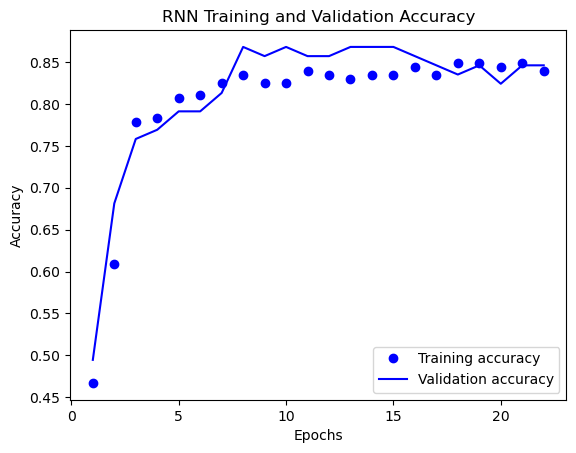

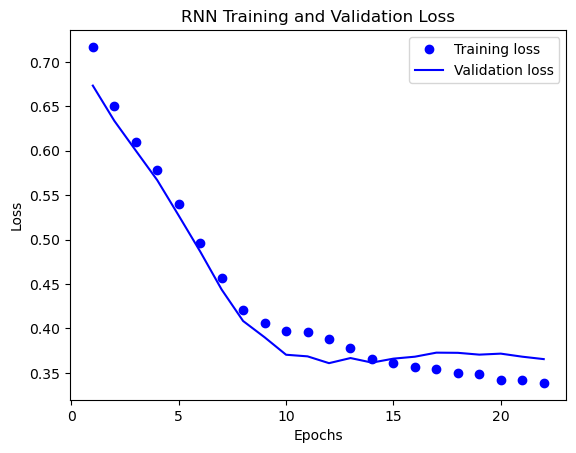

In [236]:
# Lấy thông tin lịch sử của RNN
accuracy_rnn = history_rnn.history['accuracy']
val_accuracy_rnn = history_rnn.history['val_accuracy']
loss_rnn = history_rnn.history['loss']
val_loss_rnn = history_rnn.history['val_loss']
epochs_rnn = range(1, len(accuracy_rnn) + 1)

# Vẽ đồ thị cho độ chính xác
plt.plot(epochs_rnn, accuracy_rnn, 'bo', label='Training accuracy')
plt.plot(epochs_rnn, val_accuracy_rnn, 'b', label='Validation accuracy')
plt.title('RNN Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Hiển thị biểu đồ
plt.show()

# Vẽ đồ thị cho mất mát
plt.plot(epochs_rnn, loss_rnn, 'bo', label='Training loss')
plt.plot(epochs_rnn, val_loss_rnn, 'b', label='Validation loss')
plt.title('RNN Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Hiển thị biểu đồ
plt.show()

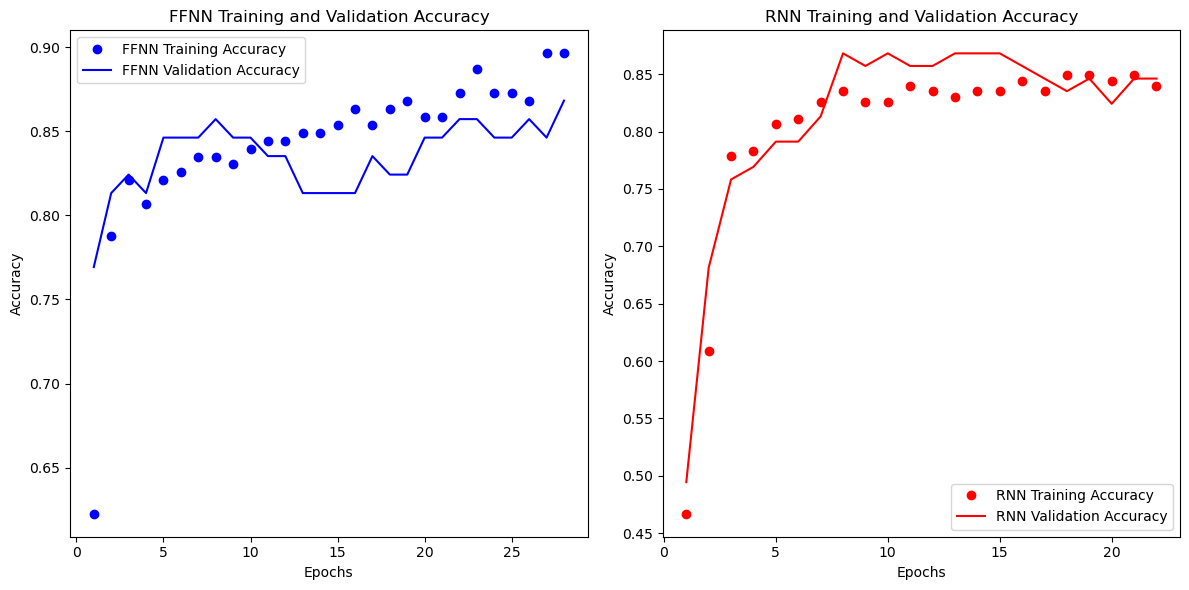

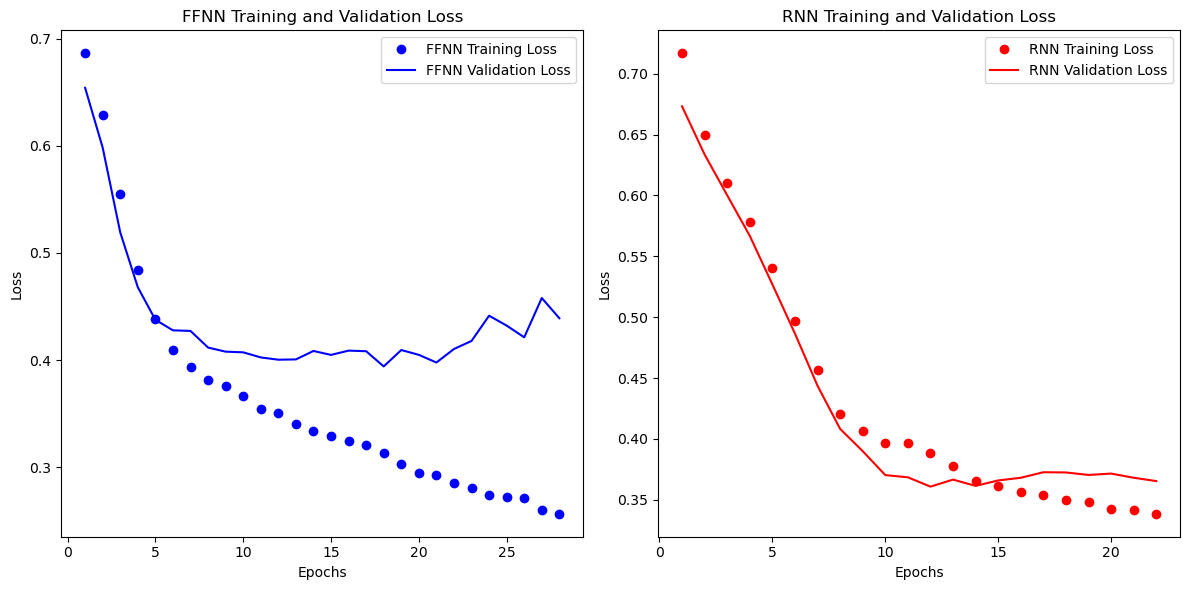

In [237]:
import matplotlib.pyplot as plt

# Vẽ biểu đồ cho độ chính xác
plt.figure(figsize=(12, 6))

# Biểu đồ cho FFNN
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'bo', label='FFNN Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='FFNN Validation Accuracy')
plt.title('FFNN Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Biểu đồ cho RNN
plt.subplot(1, 2, 2)
plt.plot(epochs_rnn, accuracy_rnn, 'ro', label='RNN Training Accuracy')
plt.plot(epochs_rnn, val_accuracy_rnn, 'r', label='RNN Validation Accuracy')
plt.title('RNN Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

# Vẽ biểu đồ cho mất mát
plt.figure(figsize=(12, 6))

# Biểu đồ cho FFNN
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='FFNN Training Loss')
plt.plot(epochs, val_loss, 'b', label='FFNN Validation Loss')
plt.title('FFNN Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Biểu đồ cho RNN
plt.subplot(1, 2, 2)
plt.plot(epochs_rnn, loss_rnn, 'ro', label='RNN Training Loss')
plt.plot(epochs_rnn, val_loss_rnn, 'r', label='RNN Validation Loss')
plt.title('RNN Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()
